In [1]:
from datetime import datetime

import matplotlib.pyplot as plt

import matplotlib as mpl

textwidth = 455.24411 / 72 # inches
golden_ratio = (1 + 5**0.5) / 2
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams['figure.figsize'] = (textwidth, textwidth / golden_ratio)
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = "Computer Modern Roman"
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['figure.titlesize'] = 12
mpl.rcParams["figure.autolayout"] = True
mpl.rcParams['text.usetex'] = True


import gym
import numpy as np
import pandas as pd
import seaborn as sns
from gym.wrappers import TimeLimit
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.env_checker import check_env

# from src.custom_cnn import CustomCNN
from src.custom_policy import CustomActorCriticPolicy, ReshapeExtractor


Use only one of the following cells

In [2]:
J = 1.0
D = 1.4
B = 0.02

In [8]:
SIDE_LENGTH = 4
STEP_SIZE = 0.5
MAX_EPISODES = 32
env = gym.make(
    "gym_xymodel:dzyaloshinskiimoriya2D-v0",
    L=SIDE_LENGTH,
    J=J,
    D=D,
    B=B,
    step_size=STEP_SIZE,
    max_episode_steps=MAX_EPISODES,
)

folder_path = "../results/medusa/dzmoriya_L4"
model = PPO.load(folder_path + "/model", env=env)

/home/michelangelo/miniconda3/envs/spinlatrl/lib/python3.9/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [100]:
SIDE_LENGTH = 6
STEP_SIZE = 0.5
env = gym.make(
    "gym_xymodel:dzyaloshinskiimoriya2D-v0",
    L=SIDE_LENGTH,
    J=J,
    D=D,
    B=B,
    step_size=STEP_SIZE,
    max_episode_steps=4 * 4**2,
)

folder_path = "../results/dzmoriya2D/L6/2022-11-28T232719_J1.0_D1.0_step0.5_mlp_nfeat128"

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [7]:
SIDE_LENGTH = 8
STEP_SIZE = 0.5

env = gym.make(
    "gym_xymodel:dzyaloshinskiimoriya2D-v0",
    L=SIDE_LENGTH,
    J=J,
    D=D,
    B=B,
    step_size=STEP_SIZE,
    max_episode_steps=2 * 4**2,
)

folder_path = "../results/dzmoriya2D/L8/2022-11-29T230007_J1.0_D1.4_B0.02_step0.5_mlp_nfeat256"
model = PPO.load(folder_path + "/logs/best_model", env=env)

/home/michelangelo/miniconda3/envs/spinlatrl/lib/python3.9/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


FileNotFoundError: [Errno 2] No such file or directory: '../results/dzmoriya2D/L8/2022-11-29T230007_J1.0_D1.4_B0.02_step0.5_mlp_nfeat256/logs/best_model.zip'

In [9]:

all_energies = []
for i in range(100):
    energies = []
    obs = env.reset()
    lattice_init = env.state_to_lattice()
    energies.append(env.compute_energy())
    for i in range(MAX_EPISODES):
        action, _state = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        energies.append(env.compute_energy())
        if done:
            # print(f"{reward=}")
            break
            # env.reset()
        # if i % 100 == 0:
        #   print(f"{i=}, {reward=}")
        #   env.render()
    all_energies.append(energies)

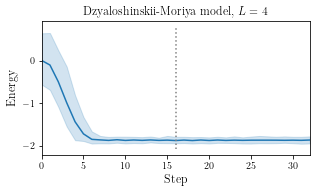

In [11]:
df = pd.DataFrame(all_energies).melt()
fig, ax = plt.subplots(figsize=(0.44 * textwidth * golden_ratio, 0.44 * textwidth))
sns.lineplot(ax = ax, x="variable", y="value", data=df, errorbar=("pi", 95))
# sns.lineplot(x="variable", y="value", data=df, errorbar=("ci", 95))
# sns.lineplot(x="variable", y="value", data=df)

plt.vlines(16, *ax.get_ylim(), linestyles="dotted", colors="gray")

plt.xlim(0, env.max_episode_steps)
# plt.hlines(-2.0, 0, env.max_episode_steps, linestyles="dashed", colors="gray")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.title(f"Dzyaloshinskii-Moriya model, $L={SIDE_LENGTH}$")
# plt.savefig(f"../results/dzmoriya_L{SIDE_LENGTH}_energy.png", dpi=600)
plt.savefig(f"../results/dzmoriya_L{SIDE_LENGTH}_energy.pdf")

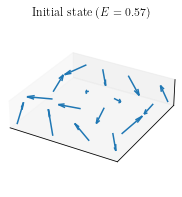

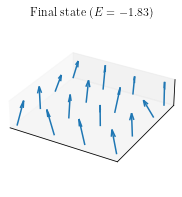

In [7]:
def plot_lattice(lattice):
    fig = plt.figure(figsize=(0.45*textwidth, 0.45*textwidth))
    # fig = plt.figure()

    ax = fig.add_subplot(projection='3d')
    # ax.set_box_aspect(aspect=(1,1,1))
    ax.set_box_aspect(aspect=(4,4,1))


    x, y, z = np.meshgrid(np.arange(SIDE_LENGTH),
                    np.arange(SIDE_LENGTH),
                    np.arange(1))
    ax.quiver(x, y, z, lattice[...,:1], lattice[...,1:2], lattice[...,2:3], length=0.75, pivot='middle', normalize=True)
    ax.set_aspect('equal')
    # ax.set_zlim(-1, 1)
    plt.xticks([])
    plt.yticks([])
    ax.set_zticks([])
    return fig, ax

fig, ax = plot_lattice(lattice_init)
# plt.title(f"Initial state $E={all_energies[-1][0]:.2f}, D={D:.1f}, B={B:.2f}$")
plt.title(f"Initial state ($E={all_energies[-1][0]:.2f}$)")
plt.tight_layout()
# plt.savefig(f"../results/dzmoriya_L{SIDE_LENGTH}_initial_state.png", dpi=600)
plt.savefig(f"../results/dzmoriya_L{SIDE_LENGTH}_initial_state.pdf")

fig, ax = plot_lattice(env.state_to_lattice())
plt.title(f"Final state ($E={all_energies[-1][-1]:.2f}$)")
plt.tight_layout()
# plt.savefig(f"../results/dzmoriya_L{SIDE_LENGTH}_final_state.png", dpi=600)
plt.savefig(f"../results/dzmoriya_L{SIDE_LENGTH}_final_state.pdf")


In [8]:
mpl.__version__

'3.6.2'

In [41]:
# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

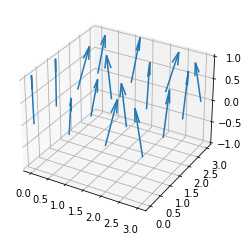

In [65]:
ax = plt.figure().add_subplot(projection='3d')
# ax.quiver(x,y,z,u,v,w, length=0.1, normalize=True)
ax.quiver(x, y, z, lattice[...,:1], lattice[...,1:2], lattice[...,2:3], pivot='mid')
ax.set_zlim(-1, 1)
plt.show()

In [64]:
lattice[...,:3]

array([[[-0.21933688,  0.29096863,  0.9312511 ],
        [ 0.21949798, -0.21812934,  0.95091546],
        [ 0.18087499,  0.25501472,  0.94986933],
        [-0.25482208,  0.07315546,  0.96421677]],

       [[-0.1399713 ,  0.23461719,  0.9619578 ],
        [ 0.2858546 , -0.13836475,  0.94823116],
        [-0.08109975, -0.10928087,  0.99069697],
        [ 0.03287575,  0.20738637,  0.97770655]],

       [[ 0.20880572,  0.26109663,  0.94245887],
        [-0.11198289, -0.0479375 ,  0.9925532 ],
        [-0.02214824,  0.1768878 ,  0.9839818 ],
        [-0.09662537,  0.43367508,  0.8958736 ]],

       [[ 0.25431564, -0.04170607,  0.9662216 ],
        [ 0.0295774 ,  0.40446696,  0.91407424],
        [ 0.29945606,  0.08807728,  0.95003605],
        [-0.07352259, -0.24698517,  0.96622604]]], dtype=float32)